In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Scrape cutomer reviews of british airlines and analyse the data collected for usable insights

### Web scraping and analysis
Scraping data from Skytrax If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 100 # this can be changed to take more or less reviews
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
# creating the dataset
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | \r\nWe traveled to Lisbon for ...
1,✅ Trip Verified | Booked a flight from Buchar...
2,✅ Trip Verified | Booked online months ago an...
3,✅ Trip Verified | The flight was on time. The...
4,"Not Verified | Angry, disappointed, and unsat..."


In [4]:
# Saving it in a csv file
df.to_csv("dataset/BA_reviews.csv")
df

,reviews
0,Not Verified | \r\nWe traveled to Lisbon for ...
1,✅ Trip Verified | Booked a flight from Buchar...
2,✅ Trip Verified | Booked online months ago an...
3,✅ Trip Verified | The flight was on time. The...
4,"Not Verified | Angry, disappointed, and unsat..."
...,...
3692,Flight from Heathrow to Toronto. Booked emerge...
3693,LHR to HAM. Purser addresses all club passenge...
3694,My son who had worked for British Airways urge...
3695,London City-New York JFK via Shannon on A318 b...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3697 entries, 0 to 3696
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3697 non-null   object
dtypes: object(1)
memory usage: 29.0+ KB


There are no null values/ missing values in out dataset. The dataset contains 3600+ unique entries.

In [6]:
import re
from stop_words import get_stop_words    
from nltk.tokenize import word_tokenize 

def clean_review(review):
     # Removing the data before | operator since a lot of them do not have trip verificatoin info
    if '|' in review:
        review =  review.split('|')[1] 
    
    # Convert to lowercase
    review = review.lower()
    
    # Remove special characters and punctuation
    review = re.sub(r'[^\w\s]', '', review)
    
    # Remove numbers
    review = re.sub(r'\d+', '', review)
    
    # Tokenization
    review = word_tokenize(review, "english")

    # Handling the stop words
    stop_words = get_stop_words('english') 

    # Removing stop words from the tokenized words list
    text_list = []

    for word in review: 
        if word not in stop_words:
            text_list.append(word)

    return text_list

In [7]:
# adding new column for the cleaned reviews
df['cleaned_reviews'] = df['reviews'].apply(clean_review)

In [8]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def calculate_sentiment_polarity(text_list):
    # Join the list of cleaned and tokenized words into a single string
    text = ' '.join(text_list)
    
    # Calculate sentiment polarity using TextBlob
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    
    # Categorize sentiment
    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    
    return polarity, sentiment

In [9]:
# Applying the sentiment analysis function to each row in the DataFrame
df[['polarity', 'sentiment']] = df['cleaned_reviews'].apply(calculate_sentiment_polarity).apply(pd.Series)

# Display the DataFrame with added polarity and sentiment columns
print(df[['reviews', 'polarity', 'sentiment']])

                                                reviews  polarity sentiment
0     Not Verified |  \r\nWe traveled to Lisbon for ...  0.135417  Positive
1     ✅ Trip Verified |  Booked a flight from Buchar... -0.247222  Negative
2     ✅ Trip Verified |  Booked online months ago an...  0.088447  Positive
3     ✅ Trip Verified |  The flight was on time. The...  0.350000  Positive
4     Not Verified |  Angry, disappointed, and unsat...  0.083333  Positive
...                                                 ...       ...       ...
3692  Flight from Heathrow to Toronto. Booked emerge...  0.150000  Positive
3693  LHR to HAM. Purser addresses all club passenge...  0.173214  Positive
3694  My son who had worked for British Airways urge...  0.113542  Positive
3695  London City-New York JFK via Shannon on A318 b...  0.340000  Positive
3696  SIN-LHR BA12 B747-436 First Class. Old aircraf... -0.003221  Negative

[3697 rows x 3 columns]


In [10]:
(df.groupby('sentiment').size()/df['sentiment'].count())*100

sentiment
Negative    29.023533
Neutral      0.676224
Positive    70.300243
dtype: float64

# Viusalizing the results

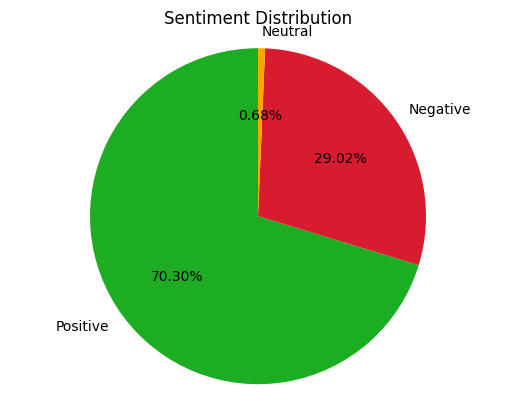

In [11]:
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment'].value_counts()

# Colors for each sentiment category
colors = {'Positive': '#1dad22', 'Negative':'#d61c2e', 'Neutral': 'orange'}

# Plotting the pie chart
fig, ax = plt.subplots()
ax.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.2f%%', startangle=90, colors=[colors[s] for s in sentiment_counts.index])

# Equal aspect ratio ensures that the pie is drawn as a circle
ax.axis('equal')  

# Title for the pie chart
plt.title('Sentiment Distribution')

# Display the pie chart
plt.show()


In [12]:
df['sentiment'].value_counts()

sentiment
Positive    2599
Negative    1073
Neutral       25
Name: count, dtype: int64

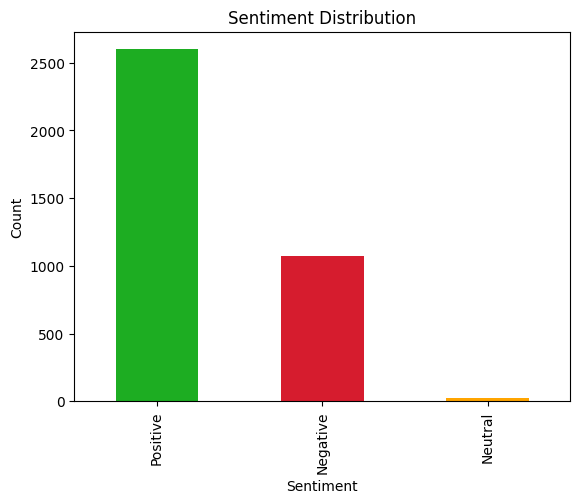

In [13]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with 'sentiment' column
sentiment_counts = df['sentiment'].value_counts()

# Plotting the histogram
fig, ax = plt.subplots()
sentiment_counts.plot(kind='bar', color=[colors[s] for s in sentiment_counts.index])

# Title and labels for the histogram
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display the histogram
plt.show()


## Word Cloud for All Reviews 

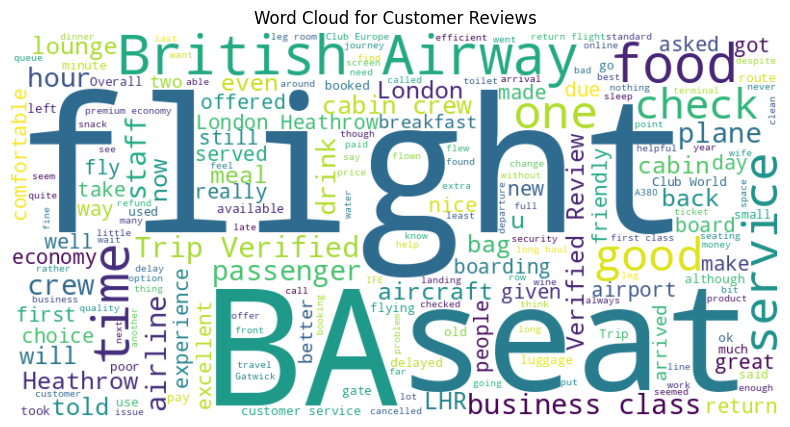

In [14]:
from wordcloud import WordCloud

# Concatenate all reviews into a single string
all_reviews = ' '.join(df['reviews'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Customer Reviews')
plt.show()


## Word Cloud for Positive Reviews

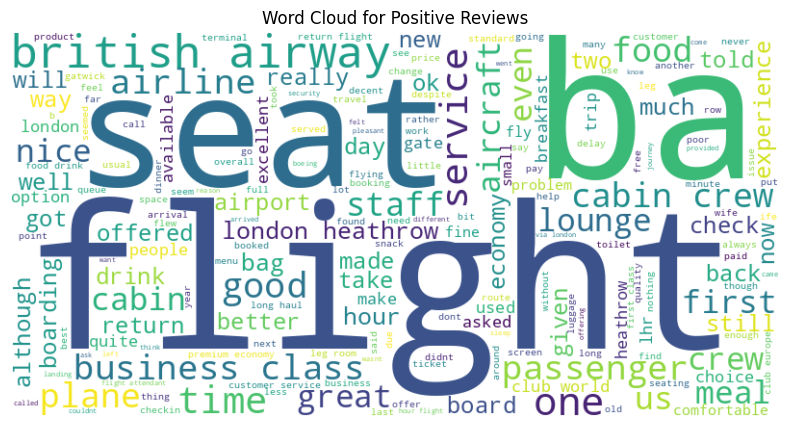

In [15]:
# Filter only positive sentiment reviews
positive_reviews = df[df['sentiment'] == 'Positive']

# Flatten the list of lists into a single list of cleaned words for positive reviews
all_positive_cleaned_words = [word for sublist in positive_reviews['cleaned_reviews'] for word in sublist]

# Combine all positive reviews into a single string
all_positive_reviews = ' '.join(all_positive_cleaned_words)

# Generate a word cloud for positive reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_positive_reviews)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()


## Word Cloud for Negative Reviews

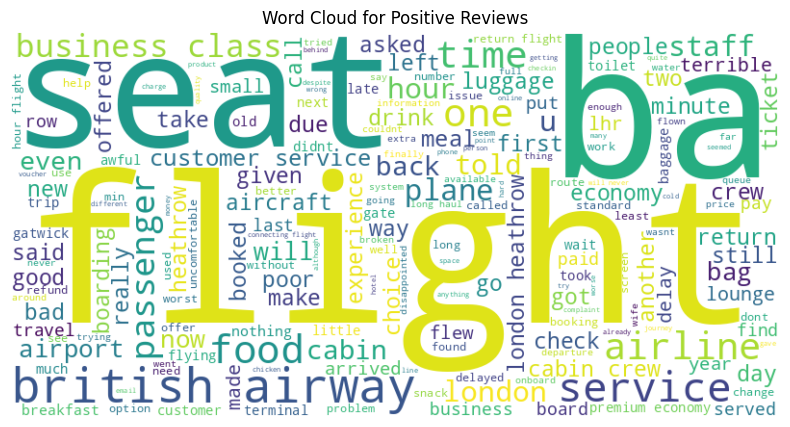

In [16]:
# Filter only positive sentiment reviews
positive_reviews = df[df['sentiment'] == 'Negative']

# Flatten the list of lists into a single list of cleaned words for positive reviews
all_positive_cleaned_words = [word for sublist in positive_reviews['cleaned_reviews'] for word in sublist]

# Combine all positive reviews into a single string
all_positive_reviews = ' '.join(all_positive_cleaned_words)

# Generate a word cloud for positive reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_positive_reviews)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()


## 20 Most Frequent words in the review

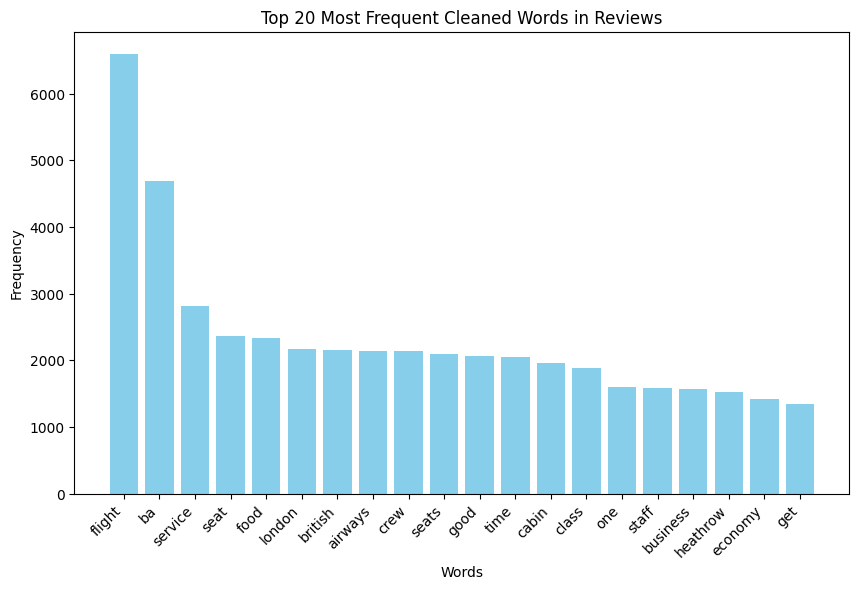

In [17]:
from collections import Counter

# Flatten the list of lists into a single list of cleaned words
all_cleaned_words = [word for sublist in df['cleaned_reviews'] for word in sublist]

# Calculate word frequencies
word_freq = Counter(all_cleaned_words)

# Convert word frequencies to DataFrame for easy plotting
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)  # Select the top 20 words

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(word_freq_df['Word'], word_freq_df['Frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Cleaned Words in Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()